In [299]:
from util import read_csv
from util import create_csv
from wikipedia_crawler import get_famous_people_and_save
from create_dataframe import merge_DataFrames_and_save

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data

In [300]:
#Create Data if it does not exit
get_famous_people_and_save()
merge_DataFrames_and_save()

c:\Users\Pascal\Documents\FH Project\dawr\dawr-grisons\src\util.py:45: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('---', pd.np.nan, inplace=True)
c:\Users\Pascal\Documents\FH Project\dawr\dawr-grisons\src\util.py:45: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('---', pd.np.nan, inplace=True)


# Read data

In [301]:
df = read_csv('data', 'combined_data_set.csv')

c:\Users\Pascal\Documents\FH Project\dawr\dawr-grisons\src\util.py:45: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df.replace('---', pd.np.nan, inplace=True)


# Rankings

In [302]:
df['Bevoelkerungsdichte_normalized_inverse'] = 1 - (df['Bevoelkerungsdichte_pro_km2'] - df['Bevoelkerungsdichte_pro_km2'].min()) / (df['Bevoelkerungsdichte_pro_km2'].max() - df['Bevoelkerungsdichte_pro_km2'].min())
df['Auslaender_in_prozent_normalized_inverse'] = (df['Auslaender_in_prozent'].max() - df['Auslaender_in_prozent']) / (df['Auslaender_in_prozent'].max() - df['Auslaender_in_prozent'].min())
df['Buenzli_Rank_ranking_1'] = ((0.9 * df['Bevoelkerungsdichte_normalized_inverse'] + 1.6 * df['Auslaender_in_prozent_normalized_inverse'] + 0.5 * df['Wahlbeteiligung']) / 3) * 100

#x_normalized_inverse = 1 - (x - x_min) / (x_max - x_min)
#x_normalized = (x - x_min) / (x_max - x_min)

df['Bevoelkerungsdichte_normalized'] = (df['Bevoelkerungsdichte_pro_km2'] - df['Bevoelkerungsdichte_pro_km2'].min()) / (df['Bevoelkerungsdichte_pro_km2'].max() - df['Bevoelkerungsdichte_pro_km2'].min())
df['Einwohner_normalized'] = (df['Einwohner'] - df['Einwohner'].min()) / (df['Einwohner'].max() - df['Einwohner'].min())
df['Socialising_Rank_ranking_2'] = ((1.4 * df['Bevoelkerungsdichte_normalized'] + 1.1 * df['Einwohner_normalized'] + 0.5 * df['No_ratio']) / 3) * 100

# Sum up the famous people for all districts (2 criteria used)
# Now calculate a ratio of famous people per capita (3rd criteria)
total_famous_people_per_district = df.groupby('district')['Famous_Person_count'].sum()
df['famous_person_count_district'] = df['district'].map(total_famous_people_per_district)
inhabitants_per_district = df.groupby('district')['Einwohner'].sum()
df['inhabitants_district'] = df['district'].map(inhabitants_per_district)
df['famous_people_per_capita'] = df['famous_person_count_district'] / df['inhabitants_district']


df['third_sector_Workers_total'] = df['third_sector_Workers_total'].replace('X', 0)
df['third_sector_Workers_total'] = pd.to_numeric(df['third_sector_Workers_total'])

df['second_sector_Workers_total'] = df['second_sector_Workers_total'].replace('X', 0)
df['second_sector_Workers_total'] = pd.to_numeric(df['second_sector_Workers_total'])

df['first_sector_Workers_total'] = df['first_sector_Workers_total'].replace('X', 0)
df['first_sector_Workers_total'] = pd.to_numeric(df['first_sector_Workers_total'])
df['third_sector_Workers_ratio'] = df['third_sector_Workers_total'] / (df['first_sector_Workers_total'] + df['second_sector_Workers_total'] + df['third_sector_Workers_total'])

df['third_sector_Workers_total_normalized'] = (df['third_sector_Workers_total'] - df['third_sector_Workers_total'].min()) / (df['third_sector_Workers_total'].max() - df['third_sector_Workers_total'].min())
df['famous_people_per_capita_normalized'] = (df['famous_people_per_capita'] - df['famous_people_per_capita'].min()) / (df['famous_people_per_capita'].max() - df['famous_people_per_capita'].min())
df['New_homes_per_1000_inhabitants_normalized'] = (df['New_homes_per_1000_inhabitants'] - df['New_homes_per_1000_inhabitants'].min()) / (df['New_homes_per_1000_inhabitants'].max() - df['New_homes_per_1000_inhabitants'].min())
df['Famous_People_relation_to_third_sector_and_new_homes_ranking_3'] = ((1.8 * df['famous_people_per_capita_normalized'] + 0.7 * df['third_sector_Workers_total_normalized'] + 0.5 * df['New_homes_per_1000_inhabitants_normalized']) / 3) * 100

create_csv('data', 'combined_data_set.csv', df, index=False, overwrite=True)

In [303]:
cols_to_show = ['Gemeinde_Name', 'Buenzli_Rank_ranking_1']
ranking_1_df = df.sort_values(by='Buenzli_Rank_ranking_1', ascending=False)
ranking_1_top_20 = ranking_1_df[cols_to_show].head(20)
print(ranking_1_top_20)

            Gemeinde_Name  Buenzli_Rank_ranking_1
23             Tschappina               96.164215
73                  Furna               94.680090
25              Safiental               93.900044
76   Conters im Prättigau               93.880634
20                Flerden               93.273509
17               Scharans               92.873142
34     Muntogna da Schons               92.307731
97                Sumvitg               91.789863
96        Medel (Lucmagn)               91.221453
27                  Avers               91.134147
26              Domleschg               90.234851
72                Fideris               89.633794
13               Lumnezia               89.381487
24                 Urmein               89.307486
70            Val Müstair               89.033625
78                 Luzein               88.714099
45                 Valsot               87.905357
21                 Masein               87.161330
91                 Grüsch               87.149959


In [304]:
cols_to_show = ['Gemeinde_Name', 'Socialising_Rank_ranking_2']
ranking_2_df = df.sort_values(by='Socialising_Rank_ranking_2', ascending=False)
ranking_2_top_20 = ranking_2_df[cols_to_show].head(20)
print(ranking_2_top_20)

        Gemeinde_Name  Socialising_Rank_ranking_2
79               Chur                   88.629474
90          Landquart                   48.428015
36          Domat/Ems                   36.832081
85             Zizers                   32.375702
15          Fürstenau                   27.332552
35            Bonaduz                   25.600884
22             Thusis                   23.339087
89             Malans                   22.768744
52         St. Moritz                   22.000201
38           Felsberg                   21.522937
71              Davos                   19.137263
77             Küblis                   18.282508
84           Untervaz                   16.540441
83            Trimmis                   15.982945
11           Schluein                   15.882523
88          Maienfeld                   15.517470
37            Rhäzüns                   15.138101
19              Cazis                   15.119231
18  Sils im Domleschg                   15.030243


In [305]:
cols_to_show = ['Gemeinde_Name', 'Famous_People_relation_to_third_sector_and_new_homes_ranking_3']
ranking_3_df = df.sort_values(by='Famous_People_relation_to_third_sector_and_new_homes_ranking_3', ascending=False)
ranking_3_top_20 = ranking_3_df[cols_to_show].head(20)
print(ranking_3_top_20)

           Gemeinde_Name  \
54  Sils im Engadin/Segl   
55            Silvaplana   
52            St. Moritz   
56                  Zuoz   
51               Samedan   
47   Celerina/Schlarigna   
49            Pontresina   
57             Bregaglia   
53               S-chanf   
46                 Bever   
50    La Punt Chamues-ch   
48              Madulain   
21                Masein   
71                 Davos   
20               Flerden   
91                Grüsch   
72               Fideris   
75              Klosters   
73                 Furna   
26             Domleschg   

    Famous_People_relation_to_third_sector_and_new_homes_ranking_3  
54                                          68.612506               
55                                          68.309680               
52                                          68.247084               
56                                          66.287099               
51                                          62.404894             

In [306]:
# merge 1 and 3
merged_df = pd.merge(ranking_1_top_20, ranking_3_top_20, on='Gemeinde_Name')
print(merged_df)

# I'll use Domleschg, as it has a good combination of buenzli_rating and famous_people_rating thus implying it's a town where the average person is a bit smarter and its still nice and cozy with a lot of nature

  Gemeinde_Name  Buenzli_Rank_ranking_1  \
0         Furna               94.680090   
1       Flerden               93.273509   
2     Domleschg               90.234851   
3       Fideris               89.633794   
4        Masein               87.161330   
5        Grüsch               87.149959   

   Famous_People_relation_to_third_sector_and_new_homes_ranking_3  
0                                          45.846722               
1                                          49.275365               
2                                          45.498153               
3                                          47.231498               
4                                          54.122576               
5                                          47.324647               


In [307]:
masein = df[df['Gemeinde_Name'] == 'Masein']
print(masein['Einwohner'])
print(masein['Auslaender_in_prozent'])
print(masein['Einwohneraenderung'])
print(masein['Bevoelkerungsdichte_pro_km2'])

21    498
Name: Einwohner, dtype: int64
21    5.220884
Name: Auslaender_in_prozent, dtype: float64
21    21.760391
Name: Einwohneraenderung, dtype: float64
21    118.571429
Name: Bevoelkerungsdichte_pro_km2, dtype: float64


# Visualizations

## Anzahl Einwohner pro km2 verglichen mit anderen Gemeinden mit ähnlichem Ausländeranteil

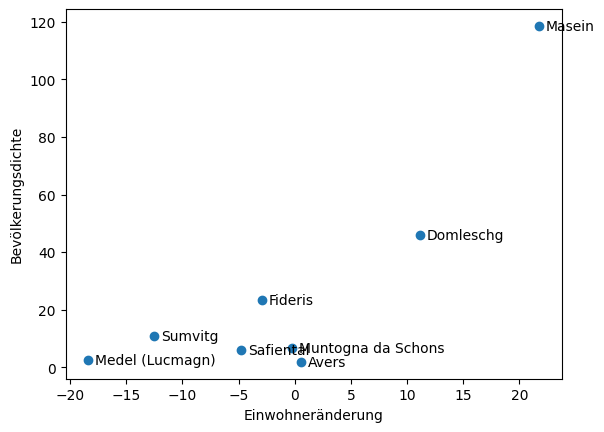

In [308]:
column_name = 'Gemeinde_Name'
value_to_select = 'Masein'

# set the number of rows above and below the selected row to include
n = 3

df = df.sort_values(by='Auslaender_in_prozent', ascending=True).reset_index(drop=True)
# create the boolean condition to select the rows that meet the condition
boolean_condition = (df[column_name] == value_to_select)
# get the range of rows based on the selected row and the number of rows above and below it
top = max(0, boolean_condition.values.argmax() - n)
bottom = boolean_condition.values.argmax() + n + 1

range_df = df.loc[top:bottom, ['Gemeinde_Name', 'Bevoelkerungsdichte_pro_km2', 'Einwohneraenderung', 'Auslaender_in_prozent', 'third_sector_Workers_ratio']]

# create the scatter plot
plt.scatter(range_df['Einwohneraenderung'], range_df['Bevoelkerungsdichte_pro_km2'])

for index, row in range_df.iterrows():
     plt.annotate(row['Gemeinde_Name'], (row['Einwohneraenderung'], row['Bevoelkerungsdichte_pro_km2']),
                 xytext=(5,-3), textcoords='offset points')

# set the labels for the axes
plt.xlabel('Einwohneränderung')
plt.ylabel('Bevölkerungsdichte')

# show the plot
plt.show()

AttributeError: 'BarContainer' object has no attribute 'get_height'

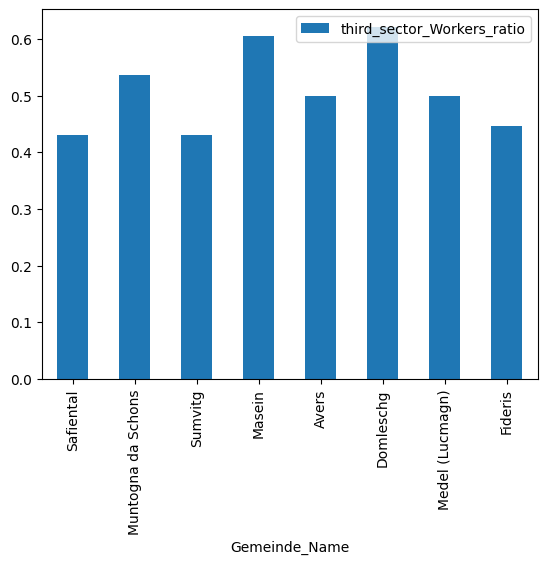

In [309]:
y_col = 'third_sector_Workers_ratio'

# create the barplot
ax = range_df.plot(kind='bar', x='Gemeinde_Name', y=y_col)

# iterate over each bar to add the annotation
for p in ax.containers:
    for i, (val, gemeinde_name) in enumerate(zip(p.get_height(), range_df['Gemeinde_Name'])):
        ax.annotate(f'{gemeinde_name}\n{val:.1f}', (p.get_x()[i] + p.get_width()[i] / 2, val),
                    ha='center', va='bottom')

# set the labels for the axes
ax.set_xlabel('Gemeinde Name')
ax.set_ylabel(y_col)

# show the plot
plt.show()

In [ ]:
df = df.sort_values(by='Bevoelkerungsdichte_pro_km2', ascending=False).reset_index(drop=True)

cols_to_show = ['Gemeinde_Name', 'Bevoelkerungsdichte_pro_km2']
print(df[cols_to_show].head(5))


  Gemeinde_Name  Bevoelkerungsdichte_pro_km2
0          Chur                   683.665192
1     Landquart                   473.276776
2     Domat/Ems                   335.755574
3        Zizers                   316.984559
4     Fürstenau                   270.454545
